# Obtain

In [1]:
## Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [2]:
## Set options for displaying Pandas DataFrames
pd.options.display.max_columns = 100
pd.options.display.max_rows = 120

In [3]:
## Define which NC voter registration columns to load in
vreg_cols_to_use = ['voter_status_desc', 'voter_status_reason_desc', 
                    'last_name', 'first_name', 'middle_name', 
                    'res_street_address', 'res_city_desc', 'state_cd',
                    'zip_code', 'race_code', 'ethnic_code', 'party_cd',
                    'gender_code', 'birth_age', 'birth_state', 
                    'drivers_lic', 'registr_dt', 'precinct_abbrv', 
                    'cong_dist_abbrv', 'super_court_abbrv', 
                    'judic_dist_abbrv', 'nc_senate_abbrv', 'nc_house_abbrv',
                    'school_dist_abbrv', 'dist_1_abbrv', 'confidential_ind', 
                    'birth_year', 'ncid', 'vtd_abbrv']

In [4]:
## Load in voter registration data for NC
nc_vreg = pd.read_table('Data/ncvoter_Statewide.zip', encoding='ISO-8859-1',
                        usecols=vreg_cols_to_use, 
                       dtype={'precinct_abbrv': str, 
                              'super_court_abbrv': str, 
                              'judic_dist_abbrv': str,
                              'school_dist_abbrv': str,
                              'vtd_abbrv': str
                             })
nc_vreg.head()

,voter_status_desc,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,dist_1_abbrv,confidential_ind,birth_year,ncid,vtd_abbrv
0,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,AA56273,08N
1,ACTIVE,VERIFIED,AARDEN,JONI,AUTUMN,117 W CLAY ST,MEBANE,NC,27302.0,W,UN,UNA,F,42,DC,Y,02/23/2018,10N,13.0,15A,15A,24.0,63.0,NaN,17.0,N,1978,AA201627,10N
2,ACTIVE,VERIFICATION PENDING,AARMSTRONG,TIMOTHY,DUANE,3670 COVINGTON TRL,MEBANE,NC,27302.0,W,UN,REP,M,54,AL,N,10/31/2020,103,13.0,15A,15A,24.0,63.0,NaN,17.0,N,1966,AA216996,103
3,ACTIVE,VERIFIED,AARON,CHRISTINA,CASTAGNA,421 WHITT AVE,BURLINGTON,NC,27215.0,W,UN,UNA,F,44,NC,Y,03/26/1996,03S,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1976,AA98377,03S
4,ACTIVE,VERIFIED,AARON,CLAUDIA,HAYDEN,1013 EDITH ST,BURLINGTON,NC,27215.0,W,NL,UNA,F,75,VA,Y,08/15/1989,124,13.0,15A,15A,24.0,63.0,NaN,17.0,N,1945,AA69747,124


In [3]:
## Define which NC voter history columns to load in
vhis_cols_to_use = ['county_id', 'voter_reg_num', 'election_lbl', 
                    'election_desc', 'voting_method', 'voted_party_cd', 
                    'pct_label', 'ncid', 'voted_county_id', 'vtd_label']

In [4]:
## Load in voter history data for NC
nc_vhis = pd.read_table('Data/ncvhis_Statewide.zip',
                        usecols=vhis_cols_to_use)
nc_vhis.head()

,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label
0,1,9050398,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,UNA,07,AA100000,1,07
1,1,9050398,03/03/2020,03/03/2020 PRIMARY,IN-PERSON,REP,07,AA100000,1,07
2,1,9050398,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,UNA,07,AA100000,1,07
3,1,9050405,11/08/2016,11/08/2016 GENERAL,ABSENTEE ONESTOP,REP,09S,AA100006,1,09S
4,1,9050405,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,REP,09S,AA100006,1,09S


# Scrub and Explore

In [24]:
## Check metadata for voter registration dataframe
nc_vreg.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8309352 entries, 0 to 8309351
Data columns (total 29 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   voter_status_desc         8309352 non-null  object 
 1   voter_status_reason_desc  8309351 non-null  object 
 2   last_name                 8309163 non-null  object 
 3   first_name                8309199 non-null  object 
 4   middle_name               7712276 non-null  object 
 5   res_street_address        8309352 non-null  object 
 6   res_city_desc             7553949 non-null  object 
 7   state_cd                  7554189 non-null  object 
 8   zip_code                  7553848 non-null  float64
 9   race_code                 8309352 non-null  object 
 10  ethnic_code               8309352 non-null  object 
 11  party_cd                  8309352 non-null  object 
 12  gender_code               8309352 non-null  object 
 13  birth_age                 8

In [25]:
## Check metadata for voter history dataframe
nc_vhis.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34818053 entries, 0 to 34818052
Data columns (total 10 columns):
 #   Column           Non-Null Count     Dtype 
---  ------           --------------     ----- 
 0   county_id        34818053 non-null  int64 
 1   voter_reg_num    34818053 non-null  int64 
 2   election_lbl     34818053 non-null  object
 3   election_desc    34818053 non-null  object
 4   voting_method    34818051 non-null  object
 5   voted_party_cd   34806146 non-null  object
 6   pct_label        34818053 non-null  object
 7   ncid             34818053 non-null  object
 8   voted_county_id  34818053 non-null  int64 
 9   vtd_label        34097359 non-null  object
dtypes: int64(3), object(7)
memory usage: 2.6+ GB


In [26]:
## Check for duplicate entries in voter registration data
nc_vreg.duplicated().sum()

0

In [5]:
## Check for duplicate entries in voter history data
nc_vhis.duplicated().sum()

410

In [22]:
## Inspect duplicate entries in voter history data
# nc_vhis.loc[nc_vhis.duplicated()]

In [8]:
## Remove duplicate entries from records of voter history
nc_vhis.drop_duplicates(inplace=True)

## Merge Voter Registration Data with Voter History Data

In [29]:
## Merge voter registration information onto records of voter history based 
  ## on unique ncid
    
## Use right join so we're only including ncid's for which their is
  ## registration and demographic information, including for those 
    ## people who are registered, but have never voted
all_nc_voters = nc_vhis.merge(nc_vreg, how='right', on='ncid')
# inspect new dataframe
display(all_nc_voters.head())
all_nc_voters.tail()

,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label,voter_status_desc,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,dist_1_abbrv,confidential_ind,birth_year,vtd_abbrv
0,1.0,9005990.0,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,08N,AA56273,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N
1,1.0,9005990.0,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,08N,AA56273,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N
2,1.0,9005990.0,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,08N,AA56273,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N
3,1.0,9005990.0,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,08N,AA56273,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N
4,1.0,9005990.0,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,08N,AA56273,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N


,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label,voter_status_desc,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,dist_1_abbrv,confidential_ind,birth_year,vtd_abbrv
35870783,100.0,26014.0,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,REP,08 CRA,ES26341,100.0,08-CRA,ACTIVE,VERIFIED,ZULICK,DAWN,ELISABETH,250 LAUREL ACRES RD,BURNSVILLE,NC,28714.0,W,NL,REP,F,57,CO,Y,11/30/2015,08 CRA,11.0,24,24,47.0,118.0,NaN,35.0,N,1963,08-CRA
35870784,100.0,26014.0,11/03/2020,11/03/2020 GENERAL,ABSENTEE ONESTOP,REP,08 CRA,ES26341,100.0,08-CRA,ACTIVE,VERIFIED,ZULICK,DAWN,ELISABETH,250 LAUREL ACRES RD,BURNSVILLE,NC,28714.0,W,NL,REP,F,57,CO,Y,11/30/2015,08 CRA,11.0,24,24,47.0,118.0,NaN,35.0,N,1963,08-CRA
35870785,100.0,26085.0,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,01 BUR,ES26380,100.0,01-BUR,ACTIVE,VERIFIED,ZULLINGER,PAMELA,YOUNG,91 W BURNSVILLE CHURCH RD,BURNSVILLE,NC,28714.0,W,NL,UNA,F,65,NC,Y,12/18/2015,01 BUR,11.0,24,24,47.0,118.0,NaN,35.0,N,1955,01-BUR
35870786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ES28936,NaN,NaN,ACTIVE,VERIFIED,ZURAWSKI,ELAINE,MICHELLE,225 GARLAND LN,GREEN MOUNTAIN,NC,28740.0,U,UN,UNA,U,35,NaN,Y,06/09/2020,05 GRE,11.0,24,24,47.0,118.0,NaN,35.0,N,1984,05-GRE
35870787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ES27200,NaN,NaN,INACTIVE,CONFIRMATION NOT RETURNED,ZYNDA,PAULA,MARGARET,115 STONEY FALLS LOOP #D3,BURNSVILLE,NC,28714.0,W,NL,REP,F,56,IN,Y,12/29/2016,11 PRI,11.0,24,24,47.0,118.0,NaN,35.0,N,1964,11-PRI


In [30]:
## Check number of unique individuals represented in all records
all_nc_voters['ncid'].nunique()

8309352

In [31]:
len(all_nc_voters)

35870788

In [32]:
## Check voter status information -- Should any categories be removed??
all_nc_voters['voter_status_desc'].value_counts()

ACTIVE       32405581
REMOVED       2193458
INACTIVE      1115666
DENIED         138925
TEMPORARY       17158
Name: voter_status_desc, dtype: int64

### Active Voters

In [14]:
active_voters = all_nc_voters.groupby('voter_status_desc').get_group('ACTIVE')
print(len(active_voters))
active_voters.head()

32405581


,county_id,county_desc,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,ncid,voted_county_id,voted_county_desc,vtd_label,vtd_description,status_cd,voter_status_desc,reason_cd,voter_status_reason_desc,absent_ind,name_prefx_cd,last_name,first_name,middle_name,name_suffix_lbl,res_street_address,res_city_desc,state_cd,zip_code,mail_addr1,mail_addr2,mail_addr3,mail_addr4,mail_city,mail_state,mail_zipcode,full_phone_number,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,precinct_desc,municipality_abbrv,municipality_desc,ward_abbrv,ward_desc,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,county_commiss_abbrv,county_commiss_desc,township_abbrv,township_desc,school_dist_abbrv,school_dist_desc,fire_dist_abbrv,fire_dist_desc,water_dist_abbrv,water_dist_desc,sewer_dist_abbrv,sewer_dist_desc,sanit_dist_abbrv,sanit_dist_desc,rescue_dist_abbrv,rescue_dist_desc,munic_dist_abbrv,munic_dist_desc,dist_1_abbrv,dist_1_desc,dist_2_abbrv,dist_2_desc,confidential_ind,birth_year,vtd_abbrv,vtd_desc
0,1.0,ALAMANCE,9005990.0,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,UNAFFILIATED,08N,NORTH NEWLIN,AA56273,1.0,ALAMANCE,08N,08N,A,ACTIVE,AV,VERIFIED,,,AABEL,RUTH,EVELYN,NaN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,4430 E GREENSBORO-CHAPEL HILL RD,NaN,NaN,NaN,GRAHAM,NC,27253,NaN,W,NL,UNA,F,85,NY,N,10/01/1984,08N,NORTH NEWLIN,NaN,NaN,NaN,NaN,13.0,15A,15A,24.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,17TH PROSECUTORIAL,,,N,1935,08N,08N
1,1.0,ALAMANCE,9005990.0,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,UNAFFILIATED,08N,NORTH NEWLIN,AA56273,1.0,ALAMANCE,08N,08N,A,ACTIVE,AV,VERIFIED,,,AABEL,RUTH,EVELYN,NaN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,4430 E GREENSBORO-CHAPEL HILL RD,NaN,NaN,NaN,GRAHAM,NC,27253,NaN,W,NL,UNA,F,85,NY,N,10/01/1984,08N,NORTH NEWLIN,NaN,NaN,NaN,NaN,13.0,15A,15A,24.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,17TH PROSECUTORIAL,,,N,1935,08N,08N
2,1.0,ALAMANCE,9005990.0,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,UNAFFILIATED,08N,NORTH NEWLIN,AA56273,1.0,ALAMANCE,08N,08N,A,ACTIVE,AV,VERIFIED,,,AABEL,RUTH,EVELYN,NaN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,4430 E GREENSBORO-CHAPEL HILL RD,NaN,NaN,NaN,GRAHAM,NC,27253,NaN,W,NL,UNA,F,85,NY,N,10/01/1984,08N,NORTH NEWLIN,NaN,NaN,NaN,NaN,13.0,15A,15A,24.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,17TH PROSECUTORIAL,,,N,1935,08N,08N
3,1.0,ALAMANCE,9005990.0,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,UNAFFILIATED,08N,NORTH NEWLIN,AA56273,1.0,ALAMANCE,08N,08N,A,ACTIVE,AV,VERIFIED,,,AABEL,RUTH,EVELYN,NaN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,4430 E GREENSBORO-CHAPEL HILL RD,NaN,NaN,NaN,GRAHAM,NC,27253,NaN,W,NL,UNA,F,85,NY,N,10/01/1984,08N,NORTH NEWLIN,NaN,NaN,NaN,NaN,13.0,15A,15A,24.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,17TH PROSECUTORIAL,,,N,1935,08N,08N
4,1.0,ALAMANCE,9005990.0,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,DEMOCRATIC,08N,NORTH NEWLIN,AA56273,1.0,ALAMANCE,08N,08N,A,ACTIVE,AV,VERIFIED,,,AABEL,RUTH,EVELYN,NaN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,4430 E GREENSBORO-CHAPEL HILL RD,NaN,NaN,NaN,GRAHAM,NC,27253,NaN,W,NL,UNA,F,85,NY,N,10/01/1984,08N,NORTH NEWLIN,NaN,NaN,NaN,NaN,13.0,15A,15A,24.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,17TH PROSECUTORIAL,,,N,1935,08N,08N


In [15]:
active_voters['voter_status_reason_desc'].value_counts()

VERIFIED                               31479176
LEGACY DATA                              396836
VERIFICATION PENDING                     292478
UNVERIFIED                               127790
CONFIRMATION PENDING                      62781
UNVERIFIED NEW                            36781
CONFIRMATION RETURNED UNDELIVERABLE        4859
CONFIRMATION NOT RETURNED                  4620
ARMED FORCES                                256
ADMINISTRATIVE                                1
Name: voter_status_reason_desc, dtype: int64

(18.0, 110.0)

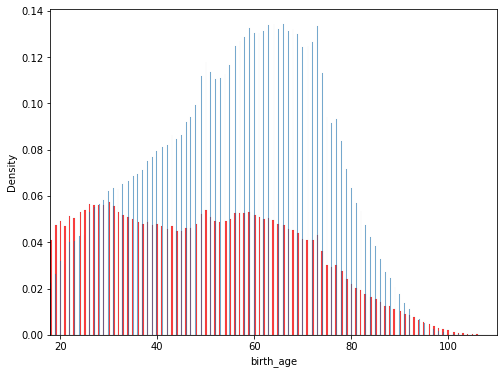

In [16]:
fig,ax = plt.subplots(figsize=(8,6))
sns.histplot(nc_vreg['birth_age'], stat='density', color='r', ax=ax)
sns.histplot(active_voters['birth_age'], stat='density', alpha=0.6, ax=ax)
ax.set_xlim(18,110)

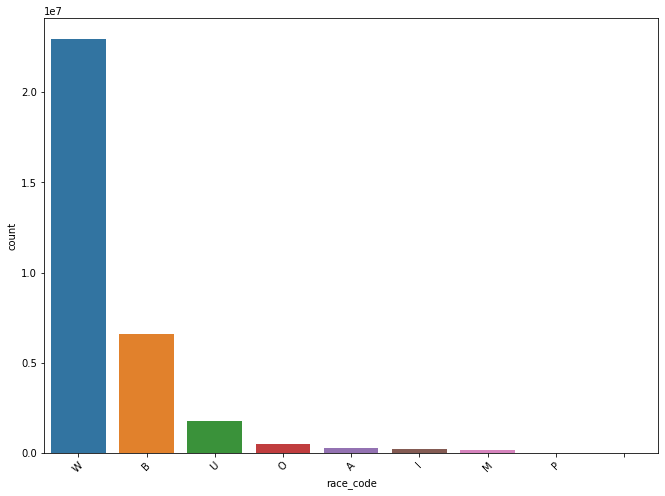

In [17]:
fig,ax = plt.subplots(figsize=(11,8))
ax = sns.countplot(x='race_code', data=active_voters,
                   order=(active_voters['race_code'].value_counts().index))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

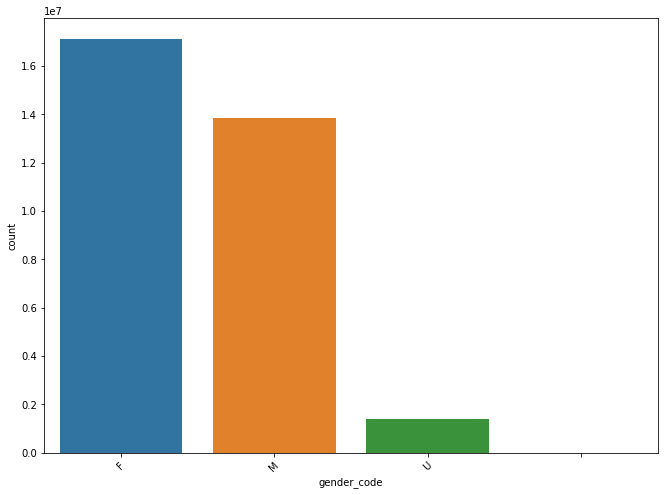

In [18]:
fig,ax = plt.subplots(figsize=(11,8))
ax = sns.countplot(x='gender_code', data=active_voters,
                   order=(active_voters['gender_code'].value_counts().index))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

### Denied Voters

In [19]:
denied_voters = all_nc_voters.groupby('voter_status_desc').get_group('DENIED')
print(len(denied_voters))
denied_voters.head()

138925


,county_id,county_desc,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,ncid,voted_county_id,voted_county_desc,vtd_label,vtd_description,status_cd,voter_status_desc,reason_cd,voter_status_reason_desc,absent_ind,name_prefx_cd,last_name,first_name,middle_name,name_suffix_lbl,res_street_address,res_city_desc,state_cd,zip_code,mail_addr1,mail_addr2,mail_addr3,mail_addr4,mail_city,mail_state,mail_zipcode,full_phone_number,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,precinct_desc,municipality_abbrv,municipality_desc,ward_abbrv,ward_desc,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,county_commiss_abbrv,county_commiss_desc,township_abbrv,township_desc,school_dist_abbrv,school_dist_desc,fire_dist_abbrv,fire_dist_desc,water_dist_abbrv,water_dist_desc,sewer_dist_abbrv,sewer_dist_desc,sanit_dist_abbrv,sanit_dist_desc,rescue_dist_abbrv,rescue_dist_desc,munic_dist_abbrv,munic_dist_desc,dist_1_abbrv,dist_1_desc,dist_2_abbrv,dist_2_desc,confidential_ind,birth_year,vtd_abbrv,vtd_desc
158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA183324,NaN,NaN,NaN,NaN,D,DENIED,DU,VERIFICATION RETURNED UNDELIVERABLE,,,ABBOTT,ASHLEY,LAUREN,NaN,700 E HAGGARD AVE #J,ELON,NC,27244.0,700 E HAGGARD AVE # J,NaN,NaN,NaN,ELON,NC,27244,NaN,W,NL,UNA,F,24,NJ,N,09/30/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,N,1996,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA215561,NaN,NaN,NaN,NaN,D,DENIED,DU,VERIFICATION RETURNED UNDELIVERABLE,,,ABBOTT,TERI,LEE,NaN,334 ROLLINGWOOD DR,BURLINGTON,NC,27217.0,334 ROLLINGWOOD DR,NaN,NaN,NaN,BURLINGTON,NC,27217,NaN,U,UN,UNA,U,55,NaN,Y,10/08/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,N,1965,NaN,NaN
790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA148645,NaN,NaN,NaN,NaN,D,DENIED,DU,VERIFICATION RETURNED UNDELIVERABLE,,,ACORD,REXANNA,NaN,NaN,302 GRAHAM RD,GRAHAM,NC,27253.0,302 GRAHAM RD,NaN,NaN,NaN,GRAHAM,NC,27253,9043386866,W,NL,REP,F,68,WV,Y,01/18/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,N,1952,NaN,NaN
1574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA105378,NaN,NaN,NaN,NaN,D,DENIED,DI,UNAVAILABLE ESSENTIAL INFORMATION,,,ADAMS,PAUL,WENDELL,NaN,1426 CLOVERDALE ST,BURLINGTON,NC,27217.0,1426 CLOVERDALE ST,NaN,NaN,NaN,BURLINGTON,NC,27217,9102229891,W,NL,REP,M,62,SC,N,12/13/1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,N,1958,NaN,NaN
1916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA196431,NaN,NaN,NaN,NaN,D,DENIED,DU,VERIFICATION RETURNED UNDELIVERABLE,,,ADEYO,ADENIKE,CELINA,NaN,1301 E DOGWOOD DR,MEBANE,NC,27302.0,1301 E DOGWOOD DR,NaN,NaN,NaN,MEBANE,NC,27302,4016999989,B,NL,DEM,F,39,OC,Y,07/19/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,N,1981,NaN,NaN


In [20]:
denied_voters['voter_status_reason_desc'].value_counts()

VERIFICATION RETURNED UNDELIVERABLE    132786
UNAVAILABLE ESSENTIAL INFORMATION        6100
MOVED FROM COUNTY                          14
CONFIRMATION NOT RETURNED                  10
FELONY CONVICTION                           8
MOVED FROM STATE                            4
UNVERIFIED                                  1
DUPLICATE                                   1
DECEASED                                    1
Name: voter_status_reason_desc, dtype: int64

(18.0, 110.0)

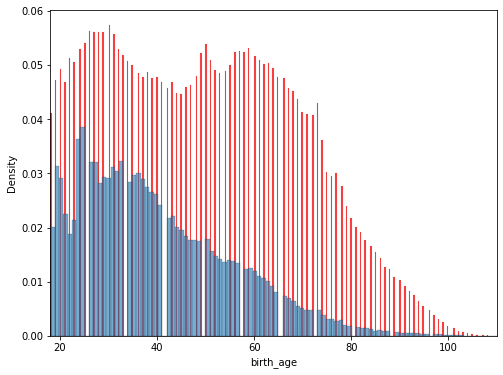

In [21]:
fig,ax = plt.subplots(figsize=(8,6))
sns.histplot(nc_vreg['birth_age'], stat='density', color='r', ax=ax)
sns.histplot(denied_voters['birth_age'], stat='density', alpha=0.6, ax=ax)
ax.set_xlim(18,110)

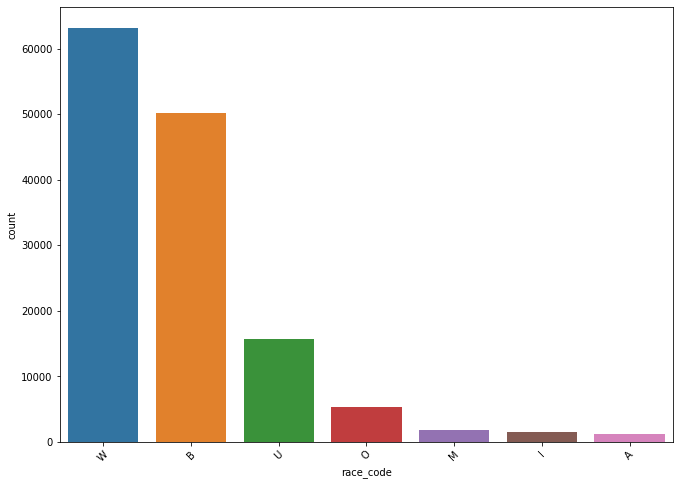

In [22]:
fig,ax = plt.subplots(figsize=(11,8))
ax = sns.countplot(x='race_code', data=denied_voters,
                   order=(denied_voters['race_code'].value_counts().index))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

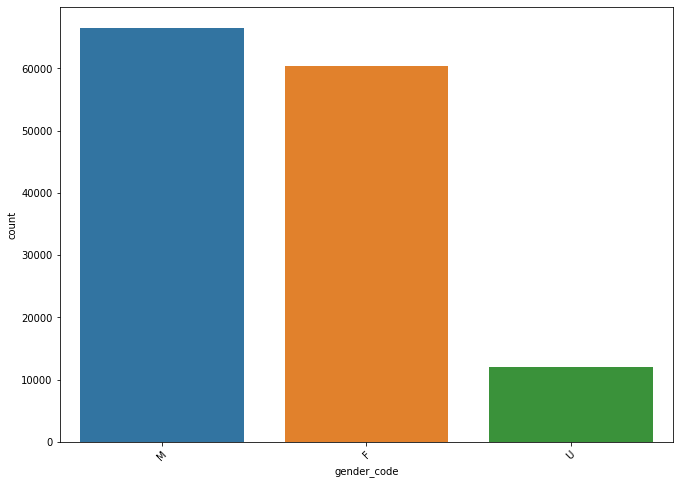

In [23]:
fig,ax = plt.subplots(figsize=(11,8))
ax = sns.countplot(x='gender_code', data=denied_voters,
                   order=(denied_voters['gender_code'].value_counts().index))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

### Inactive Voters

In [24]:
inactive_voters = all_nc_voters.groupby('voter_status_desc').get_group('INACTIVE')
print(len(inactive_voters))
inactive_voters.head()

1115666


,county_id,county_desc,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,ncid,voted_county_id,voted_county_desc,vtd_label,vtd_description,status_cd,voter_status_desc,reason_cd,voter_status_reason_desc,absent_ind,name_prefx_cd,last_name,first_name,middle_name,name_suffix_lbl,res_street_address,res_city_desc,state_cd,zip_code,mail_addr1,mail_addr2,mail_addr3,mail_addr4,mail_city,mail_state,mail_zipcode,full_phone_number,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,precinct_desc,municipality_abbrv,municipality_desc,ward_abbrv,ward_desc,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,county_commiss_abbrv,county_commiss_desc,township_abbrv,township_desc,school_dist_abbrv,school_dist_desc,fire_dist_abbrv,fire_dist_desc,water_dist_abbrv,water_dist_desc,sewer_dist_abbrv,sewer_dist_desc,sanit_dist_abbrv,sanit_dist_desc,rescue_dist_abbrv,rescue_dist_desc,munic_dist_abbrv,munic_dist_desc,dist_1_abbrv,dist_1_desc,dist_2_abbrv,dist_2_desc,confidential_ind,birth_year,vtd_abbrv,vtd_desc
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DE236758,NaN,NaN,NaN,NaN,I,INACTIVE,IN,CONFIRMATION NOT RETURNED,,,ABADILLA,STEVE,ARCEO,NaN,105 N SIXTH ST,MEBANE,NC,27302.0,105 N SIXTH ST,NaN,NaN,NaN,MEBANE,NC,27302,3365243570,O,NL,UNA,M,31,OC,Y,07/03/2014,10N,NORTH MELVILLE,MEB,MEBANE,NaN,NaN,13.0,15A,15A,24.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MEB,MEBANE,17.0,17TH PROSECUTORIAL,,,N,1989,10N,10N
224,1.0,ALAMANCE,9108338.0,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,DEMOCRATIC,128,BURLINGTON 8,BY382231,1.0,ALAMANCE,128,128,I,INACTIVE,IN,CONFIRMATION NOT RETURNED,,,ABBOTT,MARIA,LYNETTE,NaN,614 TUCKER ST,BURLINGTON,NC,27215.0,614 TUCKER ST,NaN,NaN,NaN,BURLINGTON,NC,27215,3365701418,B,NL,DEM,F,35,NC,Y,05/02/2008,128,BURLINGTON 8,BUR,BURLINGTON,NaN,NaN,13.0,15A,15A,24.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUR,BURLINGTON,17.0,17TH PROSECUTORIAL,,,N,1985,128,128
225,1.0,ALAMANCE,9108338.0,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,DEM,DEMOCRATIC,128,BURLINGTON 8,BY382231,1.0,ALAMANCE,128,128,I,INACTIVE,IN,CONFIRMATION NOT RETURNED,,,ABBOTT,MARIA,LYNETTE,NaN,614 TUCKER ST,BURLINGTON,NC,27215.0,614 TUCKER ST,NaN,NaN,NaN,BURLINGTON,NC,27215,3365701418,B,NL,DEM,F,35,NC,Y,05/02/2008,128,BURLINGTON 8,BUR,BURLINGTON,NaN,NaN,13.0,15A,15A,24.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUR,BURLINGTON,17.0,17TH PROSECUTORIAL,,,N,1985,128,128
226,1.0,ALAMANCE,9108338.0,05/08/2012,05/08/2012 PRIMARY,IN-PERSON,DEM,DEMOCRATIC,128,BURLINGTON 8,BY382231,1.0,ALAMANCE,128,128,I,INACTIVE,IN,CONFIRMATION NOT RETURNED,,,ABBOTT,MARIA,LYNETTE,NaN,614 TUCKER ST,BURLINGTON,NC,27215.0,614 TUCKER ST,NaN,NaN,NaN,BURLINGTON,NC,27215,3365701418,B,NL,DEM,F,35,NC,Y,05/02/2008,128,BURLINGTON 8,BUR,BURLINGTON,NaN,NaN,13.0,15A,15A,24.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUR,BURLINGTON,17.0,17TH PROSECUTORIAL,,,N,1985,128,128
277,1.0,ALAMANCE,9128403.0,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,UNAFFILIATED,03S,SOUTH BOONE,AA169698,1.0,ALAMANCE,03S,03S,I,INACTIVE,IN,CONFIRMATION NOT RETURNED,,,ABDEL-MAGID,LISA,ANN,NaN,1841 DUNBAR PL,BURLINGTON,NC,27215.0,1841 DUNBAR PL,NaN,NaN,NaN,BURLINGTON,NC,27215,2144378955,W,NL,UNA,F,60,DC,Y,11/10/2011,03S,SOUTH BOONE,BUR,BURLINGTON,NaN,NaN,13.0,15A,15A,24.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BUR,BURLINGTON,17.0,17TH PROSECUTORIAL,,,N,1960,03S,03S


In [25]:
inactive_voters['voter_status_reason_desc'].value_counts()

CONFIRMATION NOT RETURNED              596596
CONFIRMATION RETURNED UNDELIVERABLE    518880
ADMINISTRATIVE                            189
UNVERIFIED                                  1
Name: voter_status_reason_desc, dtype: int64

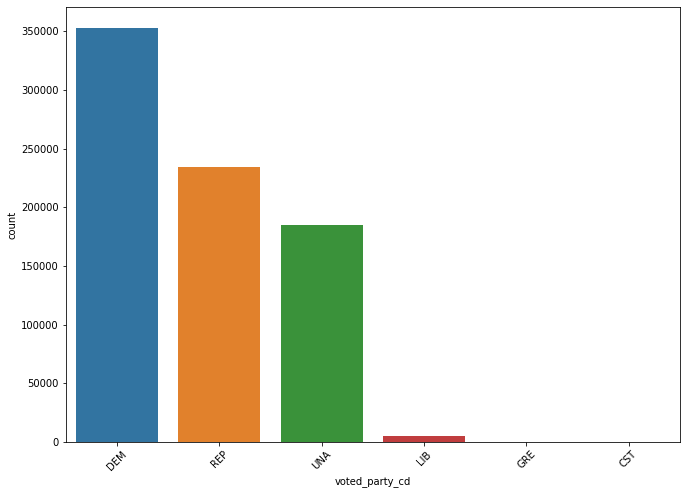

In [26]:
fig,ax = plt.subplots(figsize=(11,8))
ax = sns.countplot(x='voted_party_cd', data=inactive_voters,
                   order=(inactive_voters[
                       'voted_party_cd'].value_counts().index))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

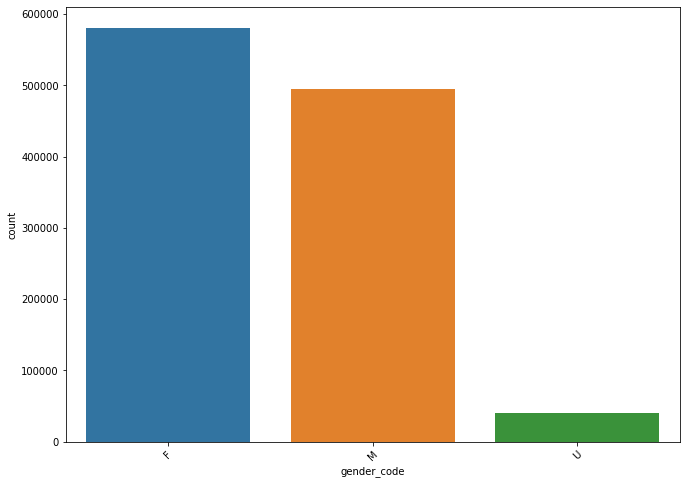

In [27]:
fig,ax = plt.subplots(figsize=(11,8))
ax = sns.countplot(x='gender_code', data=inactive_voters,
                   order=(inactive_voters['gender_code'].value_counts().index))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

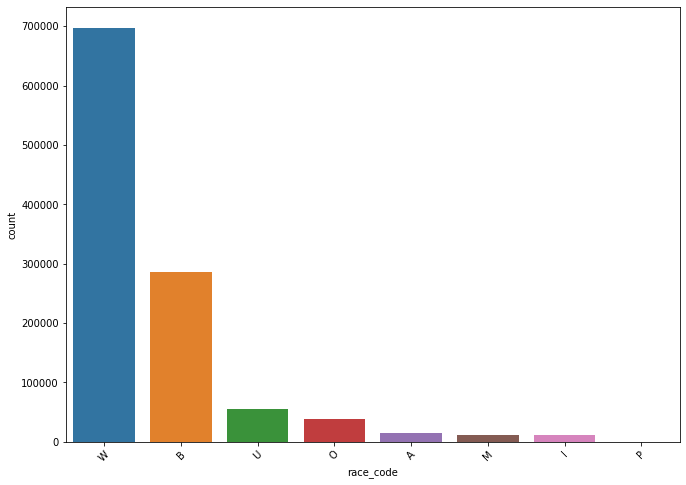

In [28]:
fig,ax = plt.subplots(figsize=(11,8))
ax = sns.countplot(x='race_code', data=inactive_voters,
                   order=(inactive_voters['race_code'].value_counts().index))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

(18.0, 110.0)

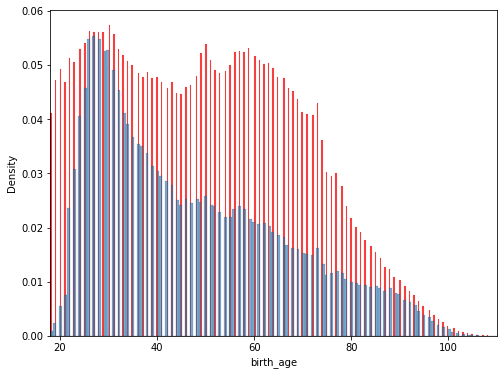

In [29]:
fig,ax = plt.subplots(figsize=(8,6))
sns.histplot(nc_vreg['birth_age'], stat='density', color='r', ax=ax)
sns.histplot(inactive_voters['birth_age'], stat='density', alpha=0.6, ax=ax)
ax.set_xlim(18,110)

### Removed Voters

In [30]:
removed_voters = all_nc_voters.groupby('voter_status_desc').get_group('REMOVED')
print(len(removed_voters))
removed_voters.head()

2193458


,county_id,county_desc,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,voted_party_desc,pct_label,pct_description,ncid,voted_county_id,voted_county_desc,vtd_label,vtd_description,status_cd,voter_status_desc,reason_cd,voter_status_reason_desc,absent_ind,name_prefx_cd,last_name,first_name,middle_name,name_suffix_lbl,res_street_address,res_city_desc,state_cd,zip_code,mail_addr1,mail_addr2,mail_addr3,mail_addr4,mail_city,mail_state,mail_zipcode,full_phone_number,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,precinct_desc,municipality_abbrv,municipality_desc,ward_abbrv,ward_desc,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,county_commiss_abbrv,county_commiss_desc,township_abbrv,township_desc,school_dist_abbrv,school_dist_desc,fire_dist_abbrv,fire_dist_desc,water_dist_abbrv,water_dist_desc,sewer_dist_abbrv,sewer_dist_desc,sanit_dist_abbrv,sanit_dist_desc,rescue_dist_abbrv,rescue_dist_desc,munic_dist_abbrv,munic_dist_desc,dist_1_abbrv,dist_1_desc,dist_2_abbrv,dist_2_desc,confidential_ind,birth_year,vtd_abbrv,vtd_desc
171,1.0,ALAMANCE,9145171.0,11/06/2012,11/06/2012 GENERAL,ABSENTEE ONESTOP,UNA,UNAFFILIATED,CG2,CG2,BY552572,41.0,GUILFORD,CG2,CG2,R,REMOVED,RL,MOVED FROM COUNTY,,,ABBOTT,DEREK,ANDREW,,REMOVED,NaN,NaN,NaN,,,,,,,,NaN,W,NL,UNA,M,52,OH,Y,02/20/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,N,1968,NaN,NaN
172,1.0,ALAMANCE,9145171.0,05/08/2012,05/08/2012 PRIMARY,ABSENTEE ONESTOP,LIB,LIBERTARIAN,CG2,CG2,BY552572,41.0,GUILFORD,CG2,CG2,R,REMOVED,RL,MOVED FROM COUNTY,,,ABBOTT,DEREK,ANDREW,,REMOVED,NaN,NaN,NaN,,,,,,,,NaN,W,NL,UNA,M,52,OH,Y,02/20/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,N,1968,NaN,NaN
173,1.0,ALAMANCE,9145171.0,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,UNAFFILIATED,08N,NORTH NEWLIN,BY552572,1.0,ALAMANCE,08N,08N,R,REMOVED,RL,MOVED FROM COUNTY,,,ABBOTT,DEREK,ANDREW,,REMOVED,NaN,NaN,NaN,,,,,,,,NaN,W,NL,UNA,M,52,OH,Y,02/20/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,N,1968,NaN,NaN
174,1.0,ALAMANCE,9145171.0,11/08/2016,11/08/2016 GENERAL,ABSENTEE BY MAIL,UNA,UNAFFILIATED,08N,NORTH NEWLIN,BY552572,1.0,ALAMANCE,08N,08N,R,REMOVED,RL,MOVED FROM COUNTY,,,ABBOTT,DEREK,ANDREW,,REMOVED,NaN,NaN,NaN,,,,,,,,NaN,W,NL,UNA,M,52,OH,Y,02/20/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,N,1968,NaN,NaN
175,1.0,ALAMANCE,9145171.0,11/06/2018,11/06/2018 GENERAL,ABSENTEE ONESTOP,UNA,UNAFFILIATED,08N,NORTH NEWLIN,BY552572,1.0,ALAMANCE,08N,08N,R,REMOVED,RL,MOVED FROM COUNTY,,,ABBOTT,DEREK,ANDREW,,REMOVED,NaN,NaN,NaN,,,,,,,,NaN,W,NL,UNA,M,52,OH,Y,02/20/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,N,1968,NaN,NaN


In [31]:
removed_voters['voter_status_reason_desc'].value_counts()

DECEASED                                                    1381692
MOVED FROM STATE                                             382720
MOVED FROM COUNTY                                            196620
REMOVED AFTER 2 FED GENERAL ELECTIONS IN INACTIVE STATUS     135538
REQUEST FROM VOTER                                            24592
FELONY CONVICTION                                             23991
MOVED WITHIN STATE                                            21835
DUPLICATE                                                      8237
FELONY SENTENCE COMPLETED                                      8020
TEMPORARY REGISTRANT                                           6645
ADMINISTRATIVE                                                 2703
REMOVED DUE TO SUSTAINED CHALLENGE                              850
UNVERIFIED                                                       10
REMOVED UNDER OLD PURGE LAW                                       5
Name: voter_status_reason_desc, dtype: int64

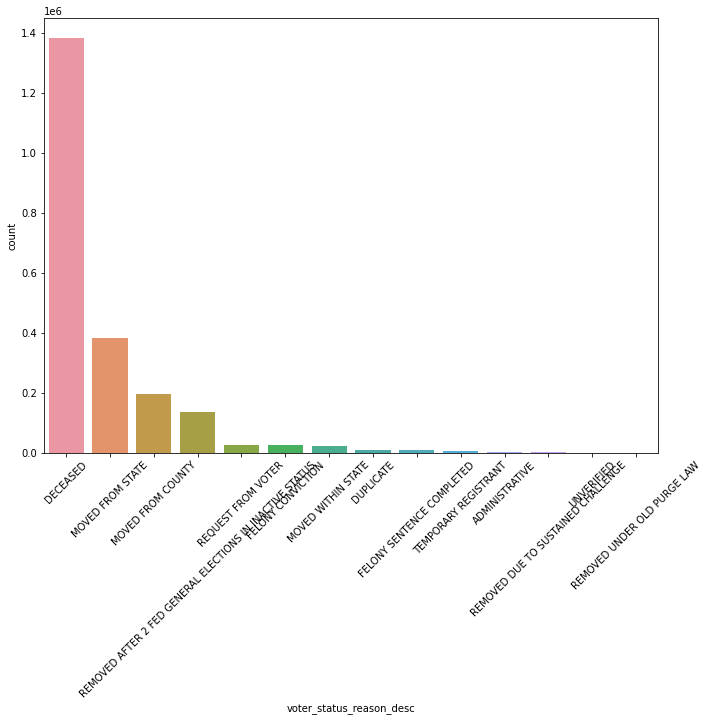

In [32]:
fig,ax = plt.subplots(figsize=(11,8))
ax = sns.countplot(x='voter_status_reason_desc', data=removed_voters,
                   order=(removed_voters[
                       'voter_status_reason_desc'].value_counts().index))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

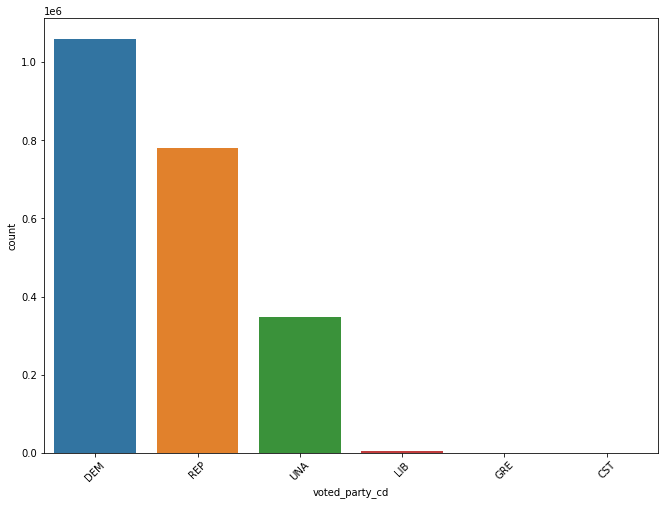

In [33]:
fig,ax = plt.subplots(figsize=(11,8))
ax = sns.countplot(x='voted_party_cd', data=removed_voters,
                   order=(removed_voters[
                       'voted_party_cd'].value_counts().index))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

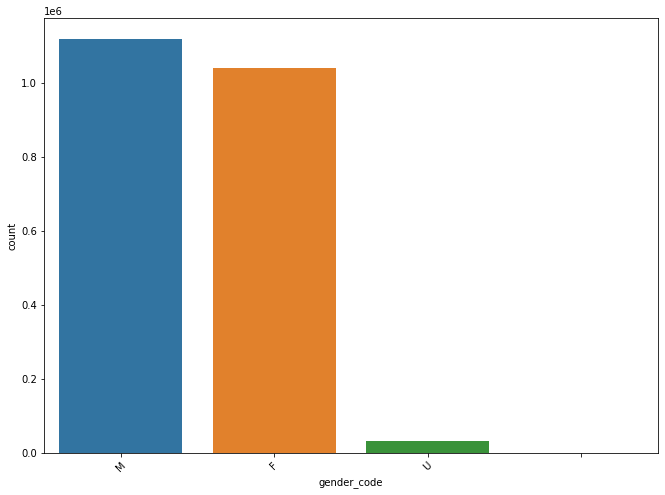

In [34]:
fig,ax = plt.subplots(figsize=(11,8))
ax = sns.countplot(x='gender_code', data=removed_voters,
                   order=(removed_voters['gender_code'].value_counts().index))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

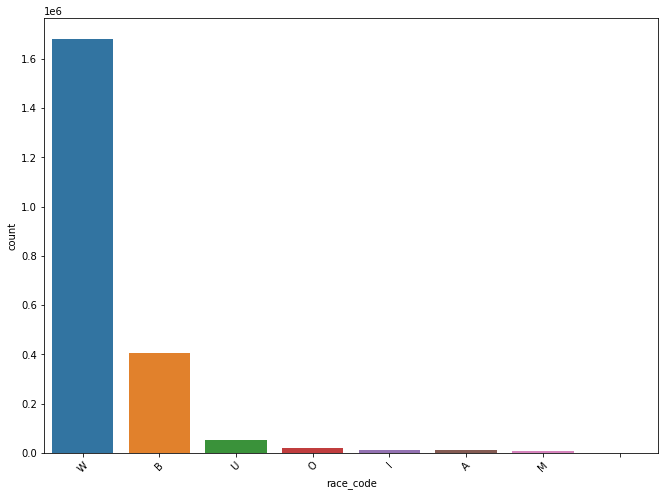

In [35]:
fig,ax = plt.subplots(figsize=(11,8))
ax = sns.countplot(x='race_code', data=removed_voters,
                   order=(removed_voters['race_code'].value_counts().index))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

(18.0, 110.0)

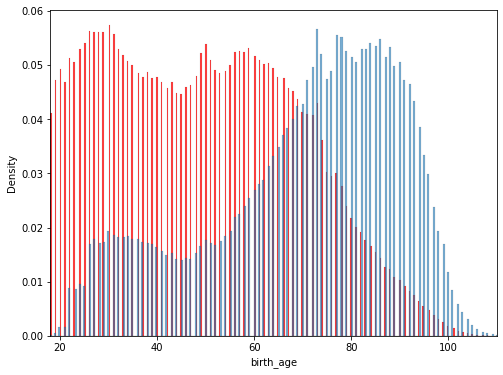

In [36]:
fig,ax = plt.subplots(figsize=(8,6))
sns.histplot(nc_vreg['birth_age'], stat='density', color='r', ax=ax)
sns.histplot(removed_voters['birth_age'], stat='density', alpha=0.6, ax=ax)
ax.set_xlim(18,110)

## Drop 'Removed' and 'Denied' Voters - Further Exploration

In [33]:
## Drop voters who have been removed or had their registration denied
nc_voters = all_nc_voters.loc[all_nc_voters['voter_status_desc'] != 'REMOVED']
nc_voters = nc_voters.loc[nc_voters['voter_status_desc'] != 'DENIED']
nc_voters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33538405 entries, 0 to 35870787
Data columns (total 38 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   county_id                 float64
 1   voter_reg_num             float64
 2   election_lbl              object 
 3   election_desc             object 
 4   voting_method             object 
 5   voted_party_cd            object 
 6   pct_label                 object 
 7   ncid                      object 
 8   voted_county_id           float64
 9   vtd_label                 object 
 10  voter_status_desc         object 
 11  voter_status_reason_desc  object 
 12  last_name                 object 
 13  first_name                object 
 14  middle_name               object 
 15  res_street_address        object 
 16  res_city_desc             object 
 17  state_cd                  object 
 18  zip_code                  float64
 19  race_code                 object 
 20  ethnic_code           

In [34]:
## Check remaining number of unique individuals represented in the data
nc_voters['ncid'].nunique()

7415538

In [ ]:
## Find record(s) with the most missing information
# print(nc_voters.isna().mean(axis=1).max())
# nc_voters.loc[nc_voters.isna().mean(axis=1).idxmax()]
# Max amount of missing values per row = 50%
# Example below is for an individual who has no voting history

In [ ]:
## The majority of records have at least 2/3 of the information
# nc_voters.isna().mean(axis=1).value_counts().sort_index(ascending=False)
## No records are perfectly complete due to several unused columns

In [35]:
## Check the number of records corresponding to the top 15 elections
elec_counts_df = nc_voters['election_desc'].value_counts().to_frame()
elec_counts_df.iloc[:15]

,election_desc
11/03/2020 GENERAL,5353370
11/08/2016 GENERAL,4488337
11/06/2012 GENERAL,3927827
11/06/2018 GENERAL,3655825
11/04/2014 GENERAL,2668840
03/15/2016 PRIMARY,2179956
03/03/2020 PRIMARY,2150401
05/08/2012 PRIMARY,1877251
05/08/2018 PRIMARY,928285
05/06/2014 PRIMARY,919808


In [36]:
# nc_voters.to_csv('Data/NC_voters.zip', index=False)

## Engineer Features for Grouping/ Database Manipulation

In [4]:
# nc_voters = pd.read_csv('Data/NC_voters.zip',
#                         dtype={'precinct_abbrv': str, 
#                               'super_court_abbrv': str, 
#                               'judic_dist_abbrv': str,
#                               'school_dist_abbrv': str,
#                               'vtd_abbrv': str
#                              })

In [5]:
nc_voters.head()

,county_id,voter_reg_num,election_lbl,election_desc,voting_method,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label,voter_status_desc,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,dist_1_abbrv,confidential_ind,birth_year,vtd_abbrv
0,1.0,9005990.0,11/03/2020,11/03/2020 GENERAL,ABSENTEE BY MAIL,UNA,08N,AA56273,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N
1,1.0,9005990.0,11/04/2014,11/04/2014 GENERAL,IN-PERSON,UNA,08N,AA56273,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N
2,1.0,9005990.0,11/06/2012,11/06/2012 GENERAL,IN-PERSON,UNA,08N,AA56273,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N
3,1.0,9005990.0,11/08/2016,11/08/2016 GENERAL,IN-PERSON,UNA,08N,AA56273,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N
4,1.0,9005990.0,03/15/2016,03/15/2016 PRIMARY,IN-PERSON,DEM,08N,AA56273,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N


In [6]:
## Create a new column specifying the election category based on the
  ## election description col
nc_voters.insert(loc=4, column='election_cat', 
                 value=nc_voters['election_desc'].str.split(n=1,
                                                            expand=True)[1])
# If the category was general or primary, leave as is, otherwise 'other'
nc_voters['election_cat'] = np.where(nc_voters['election_cat'].isin(
                                                    ['GENERAL', 'PRIMARY']),
                                     nc_voters['election_cat'], 'other')

In [7]:
## Recast election_lbl as datetime and create a new col for just the year
nc_voters['election_lbl'] = pd.to_datetime(nc_voters['election_lbl'])
nc_voters.insert(loc=4, column='election_yr',
                 value=nc_voters['election_lbl'].dt.year)

In [8]:
## Create a new binary variable indicating if it was a major election
nc_voters.insert(loc=6, column='major_elec',
                 value=np.where(((nc_voters['election_yr']%2 == 0) & 
                                 (nc_voters['election_cat'].isin(
                                     ['GENERAL', 'PRIMARY']))),
                                1,0))

# Exclude 2020 primary runoff from major elections
nc_voters.loc[nc_voters['election_desc']=='06/23/2020 PRIMARY',
              ['major_elec']]=0

In [9]:
## Group original vote methods into more general categories in a new variable
# Map the original categoriess to new ones
vote_method_map = {'ABSENTEE ONESTOP': 'Early',
                   'IN-PERSON': 'Election Day',
                   'ABSENTEE BY MAIL': 'Early',
                   'ABSENTEE CURBSIDE': 'Early',
                   'TRANSFER': 'Other',
                   'PROVISIONAL': 'Other',
                   'CURBSIDE': 'Election Day'}

# Apply the map to create new vote_method_cat column
nc_voters.insert(loc=8, column='vote_method_cat',
                 value=nc_voters['voting_method'].map(vote_method_map))

In [10]:
## Null values in the election_desc col indicate individuals that are 
  ## registered to vote, but have not voted in a recent major election.
    ## Thus, election_cat, major_elec, and presid_elec 
    ## are irrelevant for these records
# Fill irrelevant fields with null values
nc_voters.loc[nc_voters['election_desc'].isna(),
              ['election_cat', 'major_elec']] = np.nan

# Fill with NaN with 'None' in election_desc col to preserve info for
  # registered voters without a voting history when merging df's based on 
    # ncid and election_desc below
nc_voters['election_desc'].fillna('None', inplace=True)

# Inspect updated dataframe
nc_voters.head()

,county_id,voter_reg_num,election_lbl,election_desc,election_yr,election_cat,major_elec,voting_method,vote_method_cat,voted_party_cd,pct_label,ncid,voted_county_id,vtd_label,voter_status_desc,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,dist_1_abbrv,confidential_ind,birth_year,vtd_abbrv
0,1.0,9005990.0,2020-11-03,11/03/2020 GENERAL,2020.0,GENERAL,1.0,ABSENTEE BY MAIL,Early,UNA,08N,AA56273,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N
1,1.0,9005990.0,2014-11-04,11/04/2014 GENERAL,2014.0,GENERAL,1.0,IN-PERSON,Election Day,UNA,08N,AA56273,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N
2,1.0,9005990.0,2012-11-06,11/06/2012 GENERAL,2012.0,GENERAL,1.0,IN-PERSON,Election Day,UNA,08N,AA56273,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N
3,1.0,9005990.0,2016-11-08,11/08/2016 GENERAL,2016.0,GENERAL,1.0,IN-PERSON,Election Day,UNA,08N,AA56273,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N
4,1.0,9005990.0,2016-03-15,03/15/2016 PRIMARY,2016.0,PRIMARY,1.0,IN-PERSON,Election Day,DEM,08N,AA56273,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N


In [11]:
# nc_voters.to_csv('Data/NC_voters.zip', index=False)

In [43]:
## Check number of unique individuals represented by the data
nc_voters['ncid'].nunique()

7415538

In [44]:
## Store index of non-major and non-null election types
other_elec_idx = nc_voters.loc[nc_voters['election_cat']=='other'].index

## Create a df containing only major and null elections
major_elec_df = nc_voters.drop(index=other_elec_idx)

# Check number of unique individuals that voted in a recent major election, 
  # plus those with no voting history
print(major_elec_df['ncid'].nunique())

# 7588 registered voters voted in a non-major election,
  # but no major elections
nc_voters['ncid'].nunique() - major_elec_df['ncid'].nunique()

7407950


7588

## Merge DataFrames - Focus on Recent Major Elections

In [12]:
## Get list of unique ncids
nc_ncid_list = list(nc_voters['ncid'].unique())

## Get list of unique election descriptions
major_elections = list(nc_voters.groupby('major_elec').get_group(1)['election_desc'].unique())

## Add 'None' to the list to capture individuals that have not voted in any 
  ## recent major election when merging dataframes on ncid and election_desc
elec_desc_list = major_elections + ['None']
# elec_desc_list.remove('06/23/2020 PRIMARY') # remove Primary Runoff
elec_desc_list

['11/03/2020 GENERAL',
 '11/04/2014 GENERAL',
 '11/06/2012 GENERAL',
 '11/08/2016 GENERAL',
 '03/15/2016 PRIMARY',
 '11/06/2018 GENERAL',
 '05/08/2012 PRIMARY',
 '05/08/2018 PRIMARY',
 '05/06/2014 PRIMARY',
 '03/03/2020 PRIMARY',
 'None']

In [13]:
## Create multiindex that lists every election for every registered voter
mltidx = pd.MultiIndex.from_tuples(
    [(ncid, elec) for ncid in nc_ncid_list for elec in elec_desc_list],
    names=['ncid', 'election_desc'])

## Use multiindex to create new dataframe
elecs_by_voter = pd.DataFrame(index=mltidx)

In [14]:
## Check length and inspect structure of new dataframe
print(len(elecs_by_voter))
elecs_by_voter.head(15)

81570918


Empty DataFrame
Columns: []
Index: [(AA56273, 11/03/2020 GENERAL), (AA56273, 11/04/2014 GENERAL), (AA56273, 11/06/2012 GENERAL), (AA56273, 11/08/2016 GENERAL), (AA56273, 03/15/2016 PRIMARY), (AA56273, 11/06/2018 GENERAL), (AA56273, 05/08/2012 PRIMARY), (AA56273, 05/08/2018 PRIMARY), (AA56273, 05/06/2014 PRIMARY), (AA56273, 03/03/2020 PRIMARY), (AA56273, None), (AA201627, 11/03/2020 GENERAL), (AA201627, 11/04/2014 GENERAL), (AA201627, 11/06/2012 GENERAL), (AA201627, 11/08/2016 GENERAL)]

In [17]:
## Merge voter histories using the created multiindex as the keys to join
  ## each ncid onto every election and 'None'
voter_elecs = elecs_by_voter.merge(nc_vhis, how='left',
                                   on=['ncid', 'election_desc'])
# Inspect new df
print(len(voter_elecs))
display(voter_elecs.head())
voter_elecs.tail()

81571719


,ncid,election_desc,county_id,voter_reg_num,election_lbl,voting_method,voted_party_cd,pct_label,voted_county_id,vtd_label
0,AA56273,11/03/2020 GENERAL,1.0,9005990.0,11/03/2020,ABSENTEE BY MAIL,UNA,08N,1.0,08N
1,AA56273,11/04/2014 GENERAL,1.0,9005990.0,11/04/2014,IN-PERSON,UNA,08N,1.0,08N
2,AA56273,11/06/2012 GENERAL,1.0,9005990.0,11/06/2012,IN-PERSON,UNA,08N,1.0,08N
3,AA56273,11/08/2016 GENERAL,1.0,9005990.0,11/08/2016,IN-PERSON,UNA,08N,1.0,08N
4,AA56273,03/15/2016 PRIMARY,1.0,9005990.0,03/15/2016,IN-PERSON,DEM,08N,1.0,08N


,ncid,election_desc,county_id,voter_reg_num,election_lbl,voting_method,voted_party_cd,pct_label,voted_county_id,vtd_label
81571714,ES27200,05/08/2012 PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81571715,ES27200,05/08/2018 PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81571716,ES27200,05/06/2014 PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81571717,ES27200,03/03/2020 PRIMARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81571718,ES27200,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
## Check for duplicate rows
# voter_elecs.duplicated().sum()

0

In [18]:
# voter_elecs.to_csv('Data/NC_full_voter_elecs.zip', index=False)

In [31]:
nc_vreg.head()

,voter_status_desc,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,precinct_desc,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,school_dist_desc,dist_1_abbrv,dist_1_desc,confidential_ind,birth_year,ncid,vtd_abbrv,vtd_desc
0,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,NORTH NEWLIN,13.0,15A,15A,24.0,64.0,NaN,NaN,17.0,17TH PROSECUTORIAL,N,1935,AA56273,08N,08N
1,ACTIVE,VERIFIED,AARDEN,JONI,AUTUMN,117 W CLAY ST,MEBANE,NC,27302.0,W,UN,UNA,F,42,DC,Y,02/23/2018,10N,NORTH MELVILLE,13.0,15A,15A,24.0,63.0,NaN,NaN,17.0,17TH PROSECUTORIAL,N,1978,AA201627,10N,10N
2,ACTIVE,VERIFICATION PENDING,AARMSTRONG,TIMOTHY,DUANE,3670 COVINGTON TRL,MEBANE,NC,27302.0,W,UN,REP,M,54,AL,N,10/31/2020,103,MELVILLE 3,13.0,15A,15A,24.0,63.0,NaN,NaN,17.0,17TH PROSECUTORIAL,N,1966,AA216996,103,103
3,ACTIVE,VERIFIED,AARON,CHRISTINA,CASTAGNA,421 WHITT AVE,BURLINGTON,NC,27215.0,W,UN,UNA,F,44,NC,Y,03/26/1996,03S,SOUTH BOONE,13.0,15A,15A,24.0,64.0,NaN,NaN,17.0,17TH PROSECUTORIAL,N,1976,AA98377,03S,03S
4,ACTIVE,VERIFIED,AARON,CLAUDIA,HAYDEN,1013 EDITH ST,BURLINGTON,NC,27215.0,W,NL,UNA,F,75,VA,Y,08/15/1989,124,BURLINGTON 4,13.0,15A,15A,24.0,63.0,NaN,NaN,17.0,17TH PROSECUTORIAL,N,1945,AA69747,124,124


In [33]:
nc_vreg.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8309352 entries, 0 to 8309351
Data columns (total 33 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   voter_status_desc         8309352 non-null  object 
 1   voter_status_reason_desc  8309351 non-null  object 
 2   last_name                 8309163 non-null  object 
 3   first_name                8309199 non-null  object 
 4   middle_name               7712276 non-null  object 
 5   res_street_address        8309352 non-null  object 
 6   res_city_desc             7553949 non-null  object 
 7   state_cd                  7554189 non-null  object 
 8   zip_code                  7553848 non-null  float64
 9   race_code                 8309352 non-null  object 
 10  ethnic_code               8309352 non-null  object 
 11  party_cd                  8309352 non-null  object 
 12  gender_code               8309352 non-null  object 
 13  birth_age                 8

In [8]:
voter_elecs = pd.read_csv('Data/NC_full_voter_elecs.zip')
voter_elecs.head()

,ncid,election_desc,county_id,voter_reg_num,election_lbl,voting_method,voted_party_cd,pct_label,voted_county_id,vtd_label
0,AA56273,11/03/2020 GENERAL,1.0,9005990.0,11/03/2020,ABSENTEE BY MAIL,UNA,08N,1.0,08N
1,AA56273,11/04/2014 GENERAL,1.0,9005990.0,11/04/2014,IN-PERSON,UNA,08N,1.0,08N
2,AA56273,11/06/2012 GENERAL,1.0,9005990.0,11/06/2012,IN-PERSON,UNA,08N,1.0,08N
3,AA56273,11/08/2016 GENERAL,1.0,9005990.0,11/08/2016,IN-PERSON,UNA,08N,1.0,08N
4,AA56273,03/15/2016 PRIMARY,1.0,9005990.0,03/15/2016,IN-PERSON,DEM,08N,1.0,08N


In [9]:
## Merge voter registration information onto the new df based on ncid
voter_elecs = voter_elecs.merge(nc_vreg, how='left', on='ncid')
# Inspect resulting df
voter_elecs.head()

,ncid,election_desc,county_id,voter_reg_num,election_lbl,voting_method,voted_party_cd,pct_label,voted_county_id,vtd_label,voter_status_desc,voter_status_reason_desc,last_name,first_name,middle_name,res_street_address,res_city_desc,state_cd,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_age,birth_state,drivers_lic,registr_dt,precinct_abbrv,cong_dist_abbrv,super_court_abbrv,judic_dist_abbrv,nc_senate_abbrv,nc_house_abbrv,school_dist_abbrv,dist_1_abbrv,confidential_ind,birth_year,vtd_abbrv
0,AA56273,11/03/2020 GENERAL,1.0,9005990.0,11/03/2020,ABSENTEE BY MAIL,UNA,08N,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N
1,AA56273,11/04/2014 GENERAL,1.0,9005990.0,11/04/2014,IN-PERSON,UNA,08N,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N
2,AA56273,11/06/2012 GENERAL,1.0,9005990.0,11/06/2012,IN-PERSON,UNA,08N,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N
3,AA56273,11/08/2016 GENERAL,1.0,9005990.0,11/08/2016,IN-PERSON,UNA,08N,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N
4,AA56273,03/15/2016 PRIMARY,1.0,9005990.0,03/15/2016,IN-PERSON,DEM,08N,1.0,08N,ACTIVE,VERIFIED,AABEL,RUTH,EVELYN,4430 E GREENSBORO-CHAPEL HILL RD,GRAHAM,NC,27253.0,W,NL,UNA,F,85,NY,N,10/01/1984,08N,13.0,15A,15A,24.0,64.0,NaN,17.0,N,1935,08N


In [10]:
# voter_elecs.to_csv('Data/NC_full_voter_elecs.zip', index=False)

In [11]:
voter_elecs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81571719 entries, 0 to 81571718
Data columns (total 38 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ncid                      object 
 1   election_desc             object 
 2   county_id                 float64
 3   voter_reg_num             float64
 4   election_lbl              object 
 5   voting_method             object 
 6   voted_party_cd            object 
 7   pct_label                 object 
 8   voted_county_id           float64
 9   vtd_label                 object 
 10  voter_status_desc         object 
 11  voter_status_reason_desc  object 
 12  last_name                 object 
 13  first_name                object 
 14  middle_name               object 
 15  res_street_address        object 
 16  res_city_desc             object 
 17  state_cd                  object 
 18  zip_code                  float64
 19  race_code                 object 
 20  ethnic_code           